### 01. Finding the Problem - Application
 Predicting whether this Job applicant  got 
 Salary above 50K or Not from Previous 
 Company - HR

### 02.Collecting the Dataset
 * Input: Age, Education number, Capital 
 Gain & Hours/week 
 * Output: Salary above/
 below 50K

### 03.Load &Summarize the dataset

In [5]:
import pandas as pd
dataset=pd.read_csv('salary.csv')
dataset

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K
...,...,...,...,...,...
32556,22,10,0,40,<=50K
32557,27,12,0,38,<=50K
32558,40,9,0,40,>50K
32559,58,9,0,40,<=50K


In [6]:
#Find the missing values in the dataset
dataset.isnull().any()

age               False
education.num     False
capital.gain      False
hours.per.week    False
income            False
dtype: bool

### 04. Mapping Data from to Text to Binary Numbers

In [7]:
icome_set=set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K':0, '>50K':1}).astype(int)
dataset['income']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int32

### 05. Segregating Dataset into X & Y

In [10]:
X=dataset.iloc[:,0:-1].values
y=dataset.iloc[:,-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

### 06. Splitting Dataset to Train & Test

In [11]:
from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### 07.Feature Scaling


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train
X_test

array([[ 1.27591266, -1.98305776, -0.14509813, -0.03923011],
       [-1.43485534, -0.42608063, -0.14509813, -1.25599461],
       [-1.14179934, -0.03683634, -0.14509813, -0.44481828],
       ...,
       [ 0.39674466, -0.03683634, -0.14509813,  1.1775344 ],
       [ 1.42244067, -0.42608063, -0.14509813,  0.77194623],
       [ 1.20264866, -0.03683634, -0.14509813,  0.36635806]])

### 08.Model Building 

In [13]:
from sklearn.neighbors import KNeighborsClassifier 

### 09. Finding the Best K-Value - number of neighbors

##### Methods-1 :ACCURACY SCORE

['0.763', '0.804', '0.798', '0.808', '0.801', '0.813', '0.805', '0.813', '0.811', '0.814', '0.810', '0.814', '0.810', '0.815', '0.811', '0.816', '0.813', '0.814', '0.813', '0.816', '0.813', '0.817', '0.813', '0.815', '0.813', '0.814', '0.814', '0.813', '0.813', '0.816', '0.814', '0.816', '0.816', '0.815', '0.816', '0.816', '0.816', '0.813', '0.814']


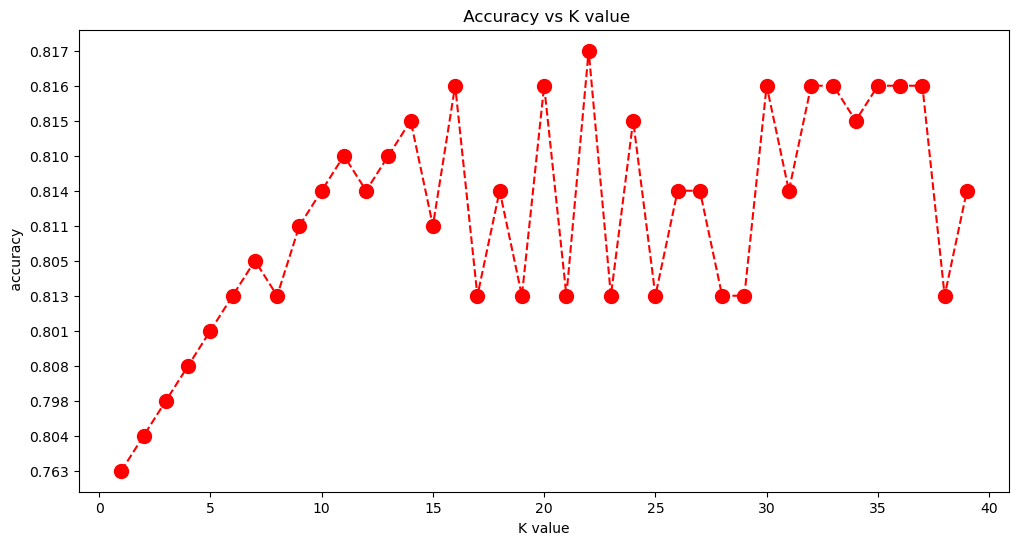

In [14]:
accuracy = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy.append(accuracy_score(pred_i, y_test).__format__('.3f'))
print(accuracy)
plt.figure(figsize=(12,6))
plt.plot(range(1,40),accuracy ,color='red' , linestyle='dashed' , marker='o',markersize=10)
plt.title(' Accuracy vs K value')
plt.xlabel('K value')
plt.ylabel(' accuracy')
plt.show()

#### Methodas-2 : Error Rate

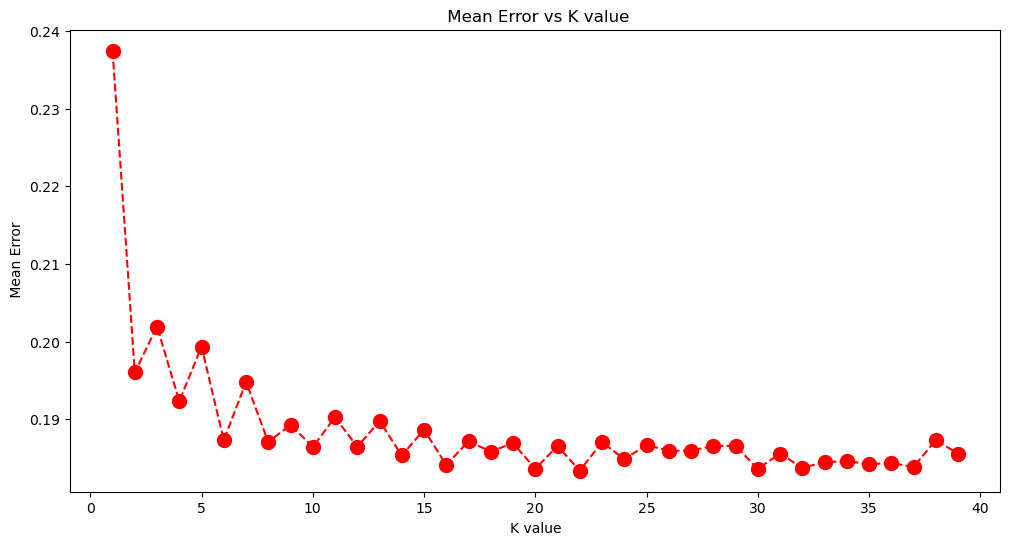

In [15]:
error=[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error ,color='red' , linestyle='dashed' , marker='o',markersize=10)
plt.title(' Mean Error vs K value')
plt.xlabel('K value')
plt.ylabel(' Mean Error')
plt.show()


### 10.Model Training 

In [22]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=22, metric='minkowski', p=1)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

0.8145191008475617


In [25]:
age=int(input('Enter your age: '))
edu=int(input('Enter your education: '))
cg=int(input('Enter your captial gain: '))
wh=int(input('Enter your Hours Per week: '))
newEmp=[[age,edu,cg,wh]]

result=model.predict(sc.transform(newEmp))
print(result)

if result ==1:
    print('Salary is high')
else:  
    print('Salary is low')

[0]
Salary is low
